In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
project=pd.read_excel(r'/content/drive/MyDrive/PROJECT 1.xlsx')
project.head()

,Column1,Gender,Year,Rate For Event Organizing,Overall feedback for Pointers2k25,Food and Services,Co ordination with Final Year,Any Suggestions for next event,Ur Opinion On Final Year Students Work
0,NaN,Female,III year,100,75,Excellent,50,Nothing,75
1,NaN,Male,III year,25,25,Fair,50,Proper planning and execution is needed,50
2,NaN,Male,III year,100,100,Good,85,Co-ordination Lacks,100
3,NaN,Female,III year,75,75,Good,50,Nothing,75
4,NaN,Male,III year,75,100,Good,75,Nothing,100


In [ ]:
project.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Column1                                 0 non-null      float64
 1   Gender                                  99 non-null     object 
 2   Year                                    99 non-null     object 
 3   Rate For Event Organizing               99 non-null     int64  
 4   Overall feedback for Pointers2k25       99 non-null     int64  
 5    Food and Services                      99 non-null     object 
 6   Co ordination with Final Year           99 non-null     int64  
 7   Any Suggestions for next event          99 non-null     object 
 8   Ur Opinion On Final Year Students Work  99 non-null     int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 7.1+ KB


In [ ]:
#mean,median
project.describe()

,Column1,Rate For Event Organizing,Overall feedback for Pointers2k25,Co ordination with Final Year,Ur Opinion On Final Year Students Work
count,0.0,99.000000,99.000000,99.000000,99.000000
mean,NaN,77.020202,81.060606,65.202020,79.292929
std,NaN,20.415570,22.613351,14.302119,19.897827
min,NaN,25.000000,25.000000,25.000000,25.000000
25%,NaN,75.000000,75.000000,50.000000,75.000000
50%,NaN,75.000000,75.000000,75.000000,75.000000
75%,NaN,100.000000,100.000000,75.000000,100.000000
max,NaN,100.000000,100.000000,85.000000,100.000000


In [ ]:
studentscount = project.groupby(['Year', 'Gender']).count()
print(studentscount)

                 Column1  Rate For Event Organizing  \
Year     Gender                                       
II year  Female        0                         27   
         Male          0                         11   
III year Female        0                         40   
         Male          0                         21   

                 Overall feedback for Pointers2k25   Food and Services  \
Year     Gender                                                          
II year  Female                                 27                  27   
         Male                                   11                  11   
III year Female                                 40                  40   
         Male                                   21                  21   

                 Co ordination with Final Year  \
Year     Gender                                  
II year  Female                             27   
         Male                               11   
III year Female         

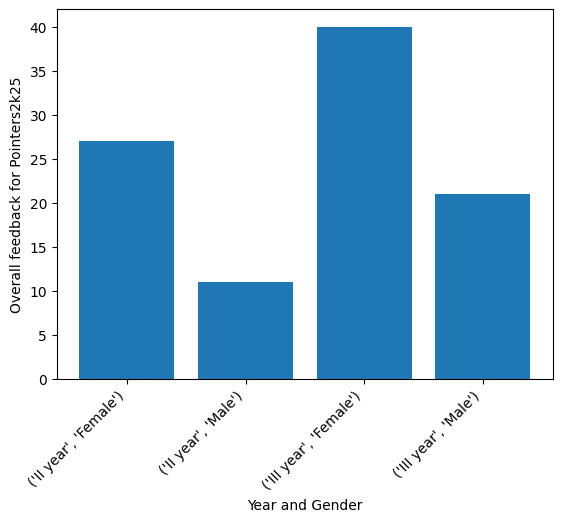

In [ ]:
x_values = [str(val) for val in studentscount.index.values]

# Plot the bar chart
plt.bar(x_values, studentscount['Overall feedback for Pointers2k25'])
plt.xlabel("Year and Gender")  # Update x-axis label
plt.ylabel("Overall feedback for Pointers2k25")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
foodcount = project[' Food and Services'].count()
print(foodcount)

99


Count of Each Category:
 Food and Services
Good         47
Excellent    30
Fair         12
Poor         10
Name: count, dtype: int64


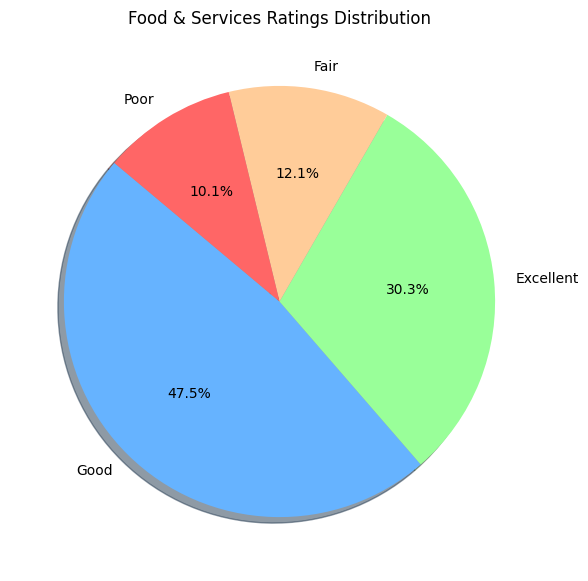

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract the "Food and Services" column from the dataset
rating_counts = project[" Food and Services"].value_counts()


# Step 2: Display category counts
print("Count of Each Category:")
print(rating_counts)

# Step 3: Convert counts to percentages
sizes = (rating_counts / rating_counts.sum()) * 100

# Step 4: Plot the Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=sizes.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=["#66b3ff", "#99ff99", "#ffcc99", "#ff6666"],
    shadow=True
)
plt.title("Food & Services Ratings Distribution")
plt.show()


                 Column1  Rate For Event Organizing  \
Year     Gender                                       
II year  Female        0                         27   
         Male          0                         11   
III year Female        0                         40   
         Male          0                         21   

                 Overall feedback for Pointers2k25  Food and Services  \
Year     Gender                                                         
II year  Female                                 27                 27   
         Male                                   11                 11   
III year Female                                 40                 40   
         Male                                   21                 21   

                 Co ordination with Final Year  \
Year     Gender                                  
II year  Female                             27   
         Male                               11   
III year Female               

<Figure size 1000x600 with 0 Axes>

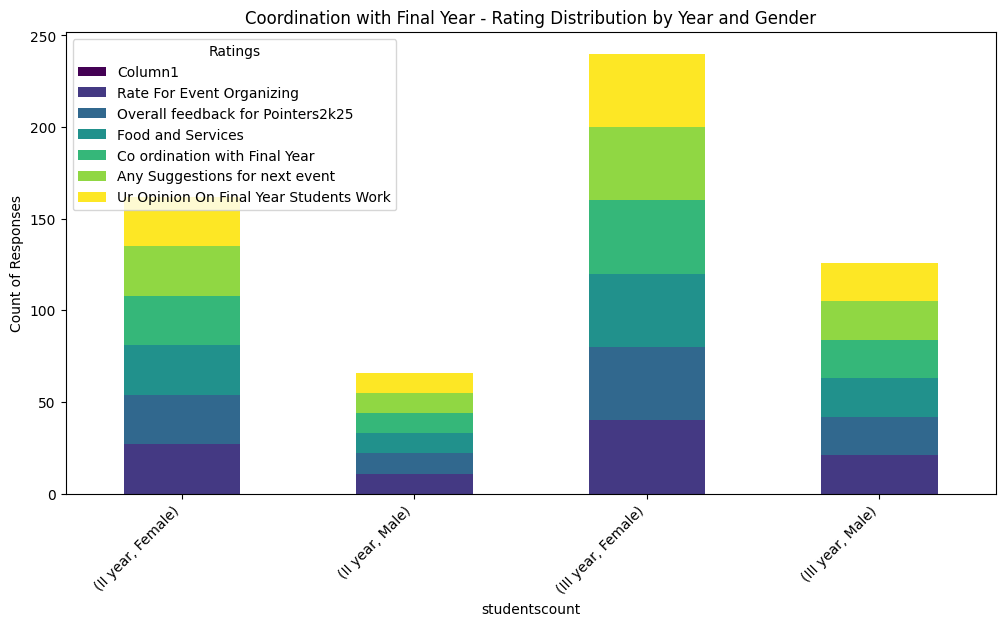

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Ensure Column Names are Correct
project.columns = project.columns.str.strip()  # Remove extra spaces in column names

studentscount = project.groupby(['Year', 'Gender']).count()
print(studentscount)

plt.figure(figsize=(10, 6))

studentscount.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")

plt.xlabel("studentscount")
plt.ylabel("Count of Responses")
plt.title("Coordination with Final Year - Rating Distribution by Year and Gender")

# Step 5: Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Step 6: Show the Chart
plt.legend(title="Ratings")
plt.show()


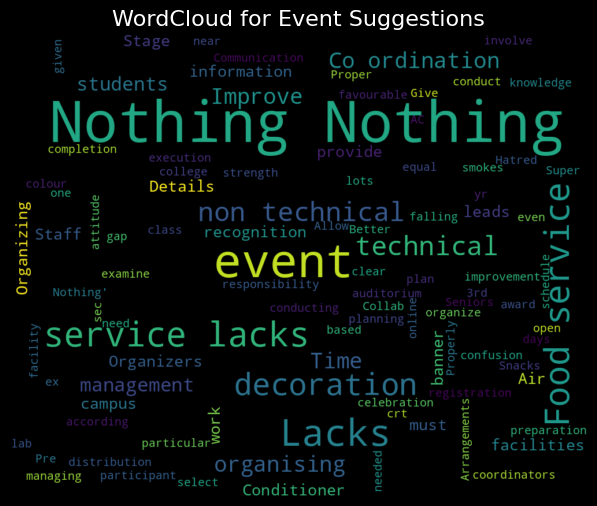

<Figure size 640x480 with 0 Axes>

In [ ]:
from wordcloud import WordCloud


# Load the dataset
project = pd.read_excel(r'/content/drive/MyDrive/PROJECT 1.xlsx')

# Extract text from the "Any Suggestions for next event" column
suggestions = project["Any Suggestions for next event"].dropna()  # Remove NaN values

# Convert the list to a single string for WordCloud
text = " ".join(suggestions)

# Generate WordCloud
wordcloud = WordCloud(
    width=1000,
    height=800,
    margin=0,
    background_color="black",
    colormap="viridis"
).generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 6), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.title("WordCloud for Event Suggestions", fontsize=16, color="white")

# Show and Save
plt.show()
plt.savefig("event_suggestions_wordcloud.png", facecolor='k', bbox_inches="tight")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-1-b3fc3582f286>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'red', 'blue'])


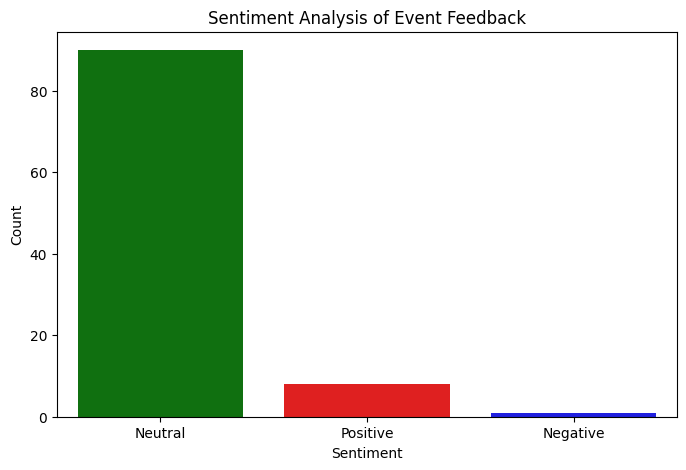

Sentiment Analysis Results (First 10 rows):
                                        Cleaned_Text VADER_Sentiment  \
0                                            nothing         Neutral   
1            proper planning and execution is needed         Neutral   
2                                co ordination lacks         Neutral   
3                                            nothing         Neutral   
4                                            nothing         Neutral   
5  allow near the falling banner colour smokes fo...        Positive   
6                                            nothing         Neutral   
7    organizers of the event could be 50 in attitude         Neutral   
8                                            nothing         Neutral   
9                                              super        Positive   

  TextBlob_Sentiment  
0            Neutral  
1            Neutral  
2            Neutral  
3            Neutral  
4            Neutral  
5           Positive  
6 

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER Lexicon
nltk.download('vader_lexicon')

# Load dataset (Replace with your actual file path)
file_path = "/content/drive/MyDrive/PROJECT 1.xlsx"
project = pd.read_excel(file_path)

# Ensure column name is correctly referred
column_name = "Any Suggestions for next event"

# Drop missing values
project = project.dropna(subset=[column_name])

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to clean and preprocess text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    return text.strip()

# Apply text cleaning
project['Cleaned_Text'] = project[column_name].apply(clean_text)

# Function to get VADER sentiment
def get_vader_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return "Positive"
    elif sentiment_score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Function to get TextBlob polarity
def get_textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
project['VADER_Sentiment'] = project['Cleaned_Text'].apply(get_vader_sentiment)
project['TextBlob_Sentiment'] = project['Cleaned_Text'].apply(get_textblob_sentiment)

# Count sentiment results
sentiment_counts = project['VADER_Sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'red', 'blue'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis of Event Feedback")
plt.show()

# Print results
print("Sentiment Analysis Results (First 10 rows):")
print(project[['Cleaned_Text', 'VADER_Sentiment', 'TextBlob_Sentiment']].head(10))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



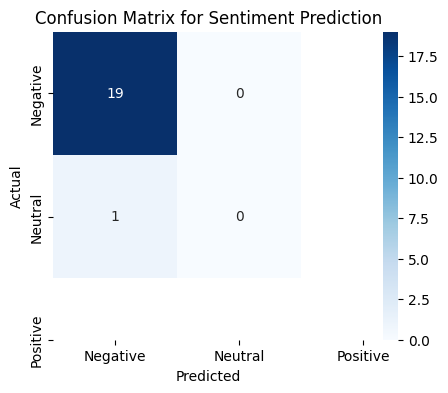

In [2]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
file_path = "/content/drive/MyDrive/PROJECT 1.xlsx"  # Update with your actual file path
project = pd.read_excel(file_path)
column_name = "Any Suggestions for next event"
project = project.dropna(subset=[column_name])

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    return text.strip()

# Apply cleaning
project['Cleaned_Text'] = project[column_name].apply(clean_text)

# Function to assign sentiment labels
def get_sentiment_label(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return "Positive"
    elif sentiment_score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
project['Sentiment'] = project['Cleaned_Text'].apply(get_sentiment_label)

# Convert sentiment labels into numerical values
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
project['Sentiment_Label'] = project['Sentiment'].map(sentiment_mapping)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    project['Cleaned_Text'], project['Sentiment_Label'], test_size=0.2, random_state=42
)

# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate Model Performance
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Sentiment Prediction")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-10-03d0957072f2>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=project, x=coordination_column, palette="coolwarm", order=project[coordination_column].value_counts().index)


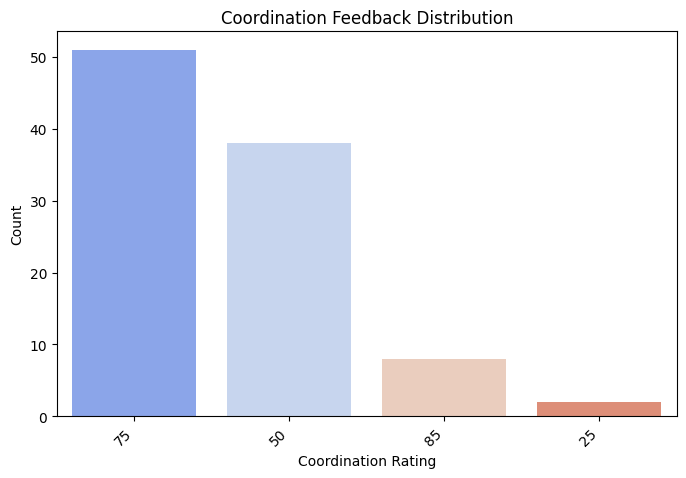

<ipython-input-10-03d0957072f2>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=project, x="Sentiment", y=coordination_column, palette="coolwarm")


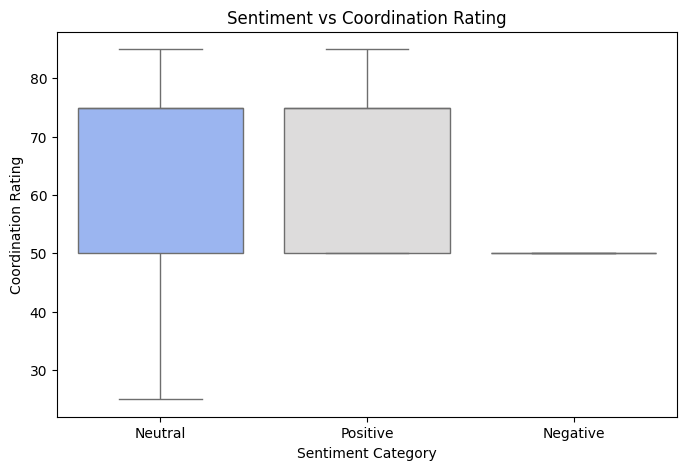

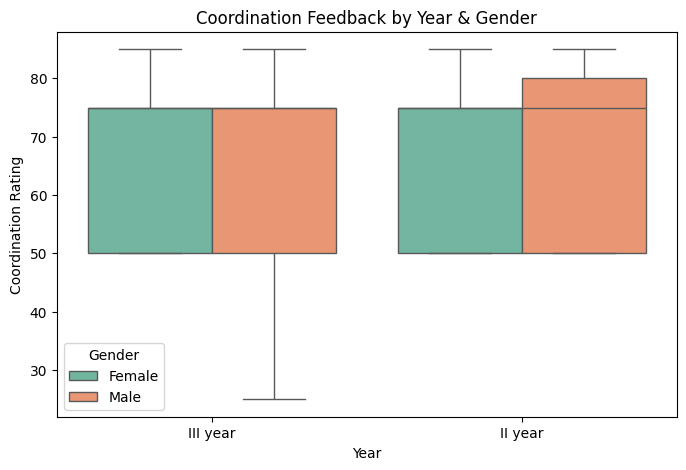

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import TextBlob

# Ensure necessary downloads
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset
file_path = "/content/drive/MyDrive/PROJECT 1.xlsx"  # Update with your file path
project = pd.read_excel(file_path)

# Ensure correct column names
coordination_column = "Co ordination with Final Year"
suggestions_column = "Any Suggestions for next event"
gender_column = "Gender"
year_column = "Year"

# -------------------------------
# 🔹 Coordination Rating Distribution
# -------------------------------
plt.figure(figsize=(8, 5))
sns.countplot(data=project, x=coordination_column, palette="coolwarm", order=project[coordination_column].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.title("Coordination Feedback Distribution")
plt.xlabel("Coordination Rating")
plt.ylabel("Count")
plt.show()

# -------------------------------
# 🔹 Sentiment Analysis vs Coordination
# -------------------------------
def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

project["Sentiment"] = project[suggestions_column].apply(get_sentiment)

plt.figure(figsize=(8, 5))
sns.boxplot(data=project, x="Sentiment", y=coordination_column, palette="coolwarm")
plt.title("Sentiment vs Coordination Rating")
plt.xlabel("Sentiment Category")
plt.ylabel("Coordination Rating")
plt.show()

# -------------------------------
# 🔹 Gender & Year-wise Coordination Feedback
# -------------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(data=project, x=year_column, y=coordination_column, hue=gender_column, palette="Set2")
plt.title("Coordination Feedback by Year & Gender")
plt.xlabel("Year")
plt.ylabel("Coordination Rating")
plt.legend(title="Gender")
plt.show()

# -------------------------------
# 🔹 Word Cloud for Poor Coordination Feedback
# -------------------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text.strip()

# Extract feedback where coordination is rated low
low_coordination_feedback = project[project[coordination_column] <= 2][suggestions_column].dropna()
low_coordination_feedback_text = " ".join(low_coordination_feedback.apply(clean_text))

wordcloud = WordCloud(width=1000, height=800, margin=0, background_color="black").generate(low_coordination_feedback_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Low Coordination Feedback")
plt.show()
